Import numpy, pandas, and matplotlib

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

Use numpy to load the data file, then store the data in a variable

In [2]:
data = numpy.loadtxt("Skyserver_Spectro2_13_2018 10_41_13 PM.csv", skiprows = 2, delimiter = ",")

Store names of colums in list names

In [3]:
names = numpy.loadtxt("Skyserver_Spectro2_13_2018 10_41_13 PM.csv", dtype=str, skiprows = 1, delimiter = ",")[0]

Create a dataframe from the csv file.

In [4]:
df = pd.read_csv("/Users/marin/machine/redshift_data_project/Skyserver_Spectro2_13_2018 10_41_13 PM.csv", \
                 delimiter = ",", skiprows=1)
df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Filter out values of -9999 and 0 from columns, leaving only actual data

In [5]:
df_filtered = df[(df['i'] != -9999.0) & (df['z'] != -9999.0) & (df['redshift'] != 0.00)]
df_filtered.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Creates equivalents to y and x_rot using the filtered dataframe instead.

In [6]:
filtered_y = df_filtered['redshift']
filtered_x = df_filtered.iloc[:,3:8]
filtered_x.head()

,u,g,r,i,z
0,25.92735,20.99570,19.24612,18.56461,18.43049
1,19.38905,18.24496,17.58728,17.20807,16.90905
2,21.50923,19.69340,18.47973,17.91998,17.55132
3,20.96947,20.29136,19.36779,18.86387,18.45551
4,25.27165,22.32081,21.33033,19.94852,19.47201


Example of Support Vector Regression

In [7]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = svm.SVR()
clf.fit(X, y) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [8]:
clf.predict([[1, 1]])

array([1.5])

In [9]:
clf.fit(filtered_x, filtered_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [10]:
filtered_x_list = []
for column in filtered_x:
    filtered_x_list.append(min(filtered_x[column]))
    filtered_x_list.append(max(filtered_x[column]))
print(filtered_x_list)

[16.25679, 27.24833, 14.80274, 25.424970000000002, 14.26476, 29.72628, 13.898439999999999, 24.36224, 13.9735, 22.827070000000003]


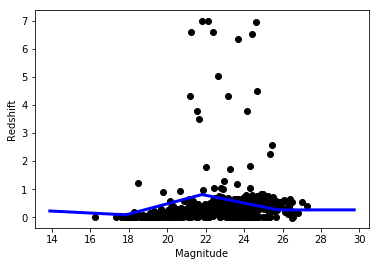

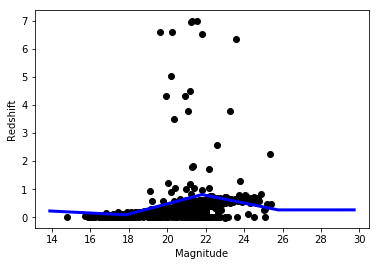

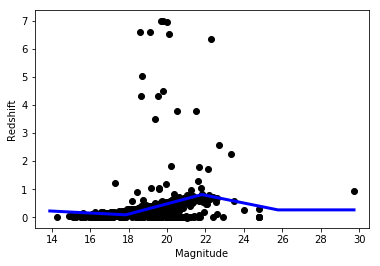

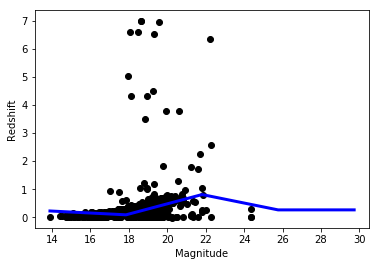

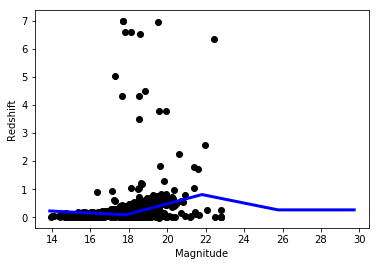

In [11]:
one_filtered_x_for_plotting = numpy.linspace(min(filtered_x_list), max(filtered_x_list), 5)
filtered_x_for_plotting = numpy.asarray([one_filtered_x_for_plotting, one_filtered_x_for_plotting, \
                                         one_filtered_x_for_plotting, one_filtered_x_for_plotting, \
                                         one_filtered_x_for_plotting])
filtered_y_for_grid = clf.predict(filtered_x_for_plotting.T)

for i in range(5):
    plt.scatter(filtered_x.iloc[:,i], filtered_y, color='black')
    plt.plot(filtered_x_for_plotting[i], filtered_y_for_grid,  color='blue', linewidth = 3)
    plt.xlabel("Magnitude")
    plt.ylabel("Redshift")
    plt.show()

In [12]:
def chi_square_error(observed_y, predicted_y):
    error = 0
    observed_y_list = observed_y.tolist()
    predicted_y_list = predicted_y.tolist()
    for i in predicted_y_list:
        error += ((observed_y_list[predicted_y_list.index(i)] - i)**2)/i
    print(error)

chi_square_error(filtered_y, filtered_y_for_grid)

1.4067174606852704


Eliminates outliers in the redshift column by

In [21]:
no_outliers_df = df_filtered[numpy.abs(df_filtered['redshift']-df_filtered['redshift'].mean())\
                             <=(3*df_filtered['redshift'].std())]
no_outliers_df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


In [25]:
filtered_no_outliers_y = no_outliers_df['redshift']
filtered_no_outliers_x = no_outliers_df.iloc[:,3:8]
filtered_no_outliers_x.head()

,u,g,r,i,z
0,25.92735,20.99570,19.24612,18.56461,18.43049
1,19.38905,18.24496,17.58728,17.20807,16.90905
2,21.50923,19.69340,18.47973,17.91998,17.55132
3,20.96947,20.29136,19.36779,18.86387,18.45551
4,25.27165,22.32081,21.33033,19.94852,19.47201


In [27]:
clf.fit(filtered_no_outliers_x, filtered_no_outliers_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
filtered_no_outliers_x_list = []
for column in filtered_no_outliers_x:
    filtered_no_outliers_x_list.append(min(filtered_no_outliers_x[column]))
    filtered_no_outliers_x_list.append(max(filtered_no_outliers_x[column]))
print(filtered_no_outliers_x_list)

[16.25679, 27.24833, 14.80274, 25.424970000000002, 14.26476, 29.72628, 13.898439999999999, 24.36224, 13.9735, 22.827070000000003]


In [ ]:
one_no_outliers_filtered_x_for_plotting = numpy.linspace(min(filtered_no_outliers_x_list), max(filtered_no_outliers_x_list), 5)
no_outliers_filtered_x_for_plotting = numpy.asarray([one_no_outliers_filtered_x_for_plotting, \
                                                     one_no_outliers_filtered_x_for_plotting, \
                                         one_no_outliers_filtered_x_for_plotting, one_no_outliers_filtered_x_for_plotting, \
                                         one_no_outliers_filtered_x_for_plotting])
filtered_y_for_grid = clf.predict(filtered_no_outliersx_for_plotting.T)

for i in range(5):
    plt.scatter(filtered_x.iloc[:,i], filtered_y, color='black')
    plt.plot(filtered_x_for_plotting[i], filtered_y_for_grid,  color='blue', linewidth = 3)
    plt.xlabel("Magnitude")
    plt.ylabel("Redshift")
    plt.show()